<a href="https://colab.research.google.com/github/NeuromatchAcademy/course-content/blob/master/tutorials/W1D3-ModelFitting/student/W1D3_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neuromatch Academy: Week 1, Day 3, Tutorial 1
# Model Fitting: Linear regression with MSE


#Tutorial Objectives

This is Tutorial 1 of a series on fitting models to data. We start with simple linear regression, using least squares optimization (Tutorial 1) and Maximum Likelihood Estimation (Tutorial 2). We will use bootstrapping to build confidence intervals around the inferred linear model parameters (Tutorial 3). We'll finish our exploration of linear models by  generalizing to multiple linear regression (Tutorial 4). We then move on to polynomial regression (Tutorial 5). We end by learning how to choose between these various models. We discuss the bias-variance trade-off (Tutorial 6) and two common methods for model selection, AIC and Cross Validation (Tutorial 7). 

In this tutorial, we will learn how to fit simple linear models to data.
- Learn how to calculate the mean-squared error (MSE) 
- Explore how model parameters (slope) influence the MSE
- Learn how to find the optimal model parameter using least-squares optimization

---

**acknowledgements:** 
- we thank Eero Simoncelli, much of this tutorial is inspired by exercises asigned in his mathtools class.

# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets

In [2]:
#@title Figure Settings
%matplotlib inline
fig_w, fig_h = (8, 6)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})
%config InlineBackend.figure_format = 'retina'

# Mean Squared Error (MSE)

Video available at https://youtube.com/watch?v=8e9Hvc8zaUQ


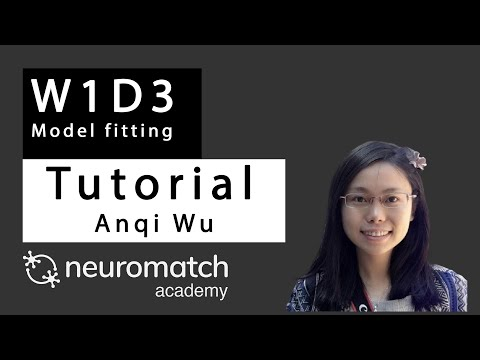

In [3]:
#@title Video: Linear Regression & Mean Squared Error
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="8e9Hvc8zaUQ", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video


Linear least squares regression is an old but gold  optimization procedure that we are going to use for data fitting. Least squares (LS) optimization problems are those in which the objective function is a quadratic function of the
parameter(s) being optimized.

Suppose you have a set of measurements, $y_{n}$ (the "dependent" variable) obtained for different input values, $x_{n}$ (the "independent" or "explanatory" variable). Suppose we believe the measurements are proportional to the input values, but are corrupted by some (random) measurement errors, $\epsilon_{n}$, that is:

$$y_{n}= \theta x_{n}+\epsilon_{n}$$

for some unknown slope parameter $\theta.$ The least squares regression problem uses mean squared error (MSE) as its objective function, it aims to find the value of the parameter $\theta$ by minimizing the average of squared errors:

\begin{align}
\min _{\theta} \frac{1}{N}\sum_{n=1}^{N}\left(y_{n}-\theta x_{n}\right)^{2}
\end{align}

We will now explore how MSE is used in fitting a linear regression model to data. For illustrative purposes, we will create a simple synthetic dataset where we know the true underlying model. This will allow us to see how our estimation efforts compare in uncovering the real model (though in practice we rarely have this luxury).

First we will generate some noisy samples $x$ from [0, 10) along the line $y = 1.2x$ as our dataset we wish to fit a model to.

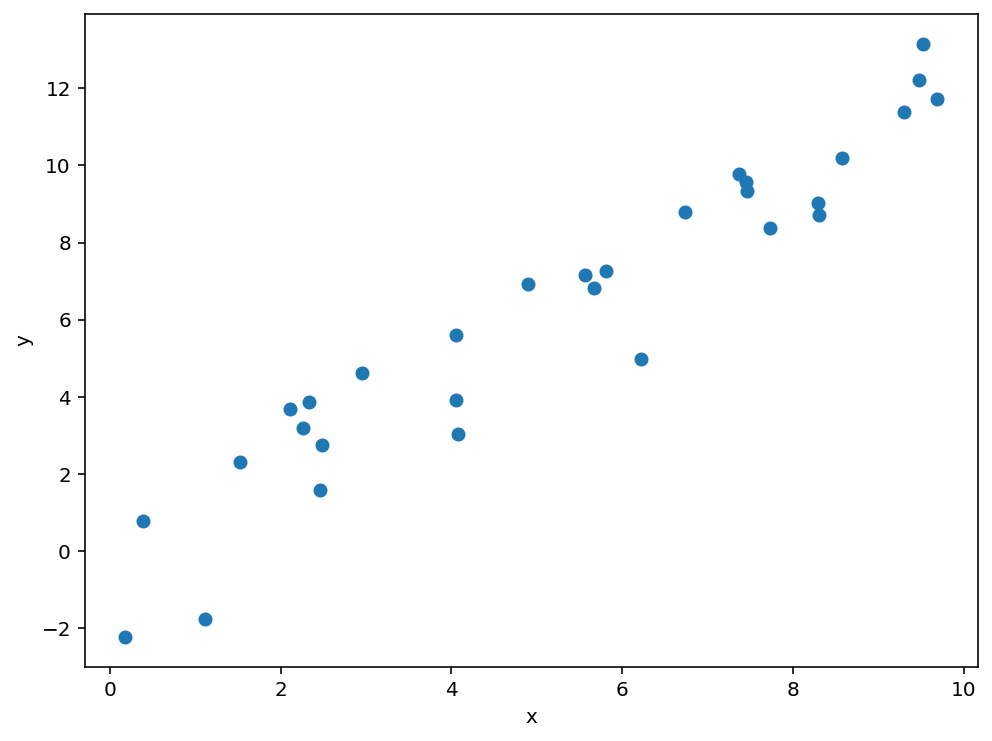

In [4]:
# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence
np.random.seed(121)
theta = 1.2
n_samples = 30
x = 10*np.random.rand(n_samples) # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples) # sample from a standard normal distribution
y = theta*x + noise

fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

Now that we have our suitably noisy dataset, we can start trying to estimate the underlying model that produced it. We use MSE to evaluate how successful a particular slope estimate $\hat{\theta}$ is for explaining the data, with the closer to 0 the MSE is, the better our estimate fits the data.

### Exercise: Compute MSE

In this exercise you will implement a method to compute the mean squared error for a set of inputs $x$, measurements $y$, and slope estimate $\hat{\theta}$.

In [5]:
def mse(x, y, theta_hat):
  """Compute the mean squared error
  
  Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    theta_hat (float): An estimate of the slope parameter. 

  Returns:
    float: The mean squared error of the data with the estimated parameter.
  """
  ####################################################
  ## TODO for students: compute the mean squared error
  ####################################################
  # comment this out when you've filled
  raise NotImplementedError("Student excercise: compute the mean squared error")
  return mse

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W1D3-ModelFitting/solutions/W1D3_Tutorial1_Solution_d584a2c8.py)



Now that we have our MSE method, let's see what errors we observe for different values of $\hat{\theta}$.





In [7]:
theta_hats = [0.75, 1.0, 1.5]
for theta_hat in theta_hats:
  print(f"theta_hat of {theta_hat} has an MSE of {mse(x, y, theta_hat):.2f}")

theta_hat of 0.75 has an MSE of 9.08
theta_hat of 1.0 has an MSE of 3.01
theta_hat of 1.5 has an MSE of 4.52


We should see that $\hat{\theta} = 1.0$ is our best estimate from the three we tried. Looking just at the raw numbers, however, isn't always satisfying, so let's visualize what our estimated model looks like over the data.



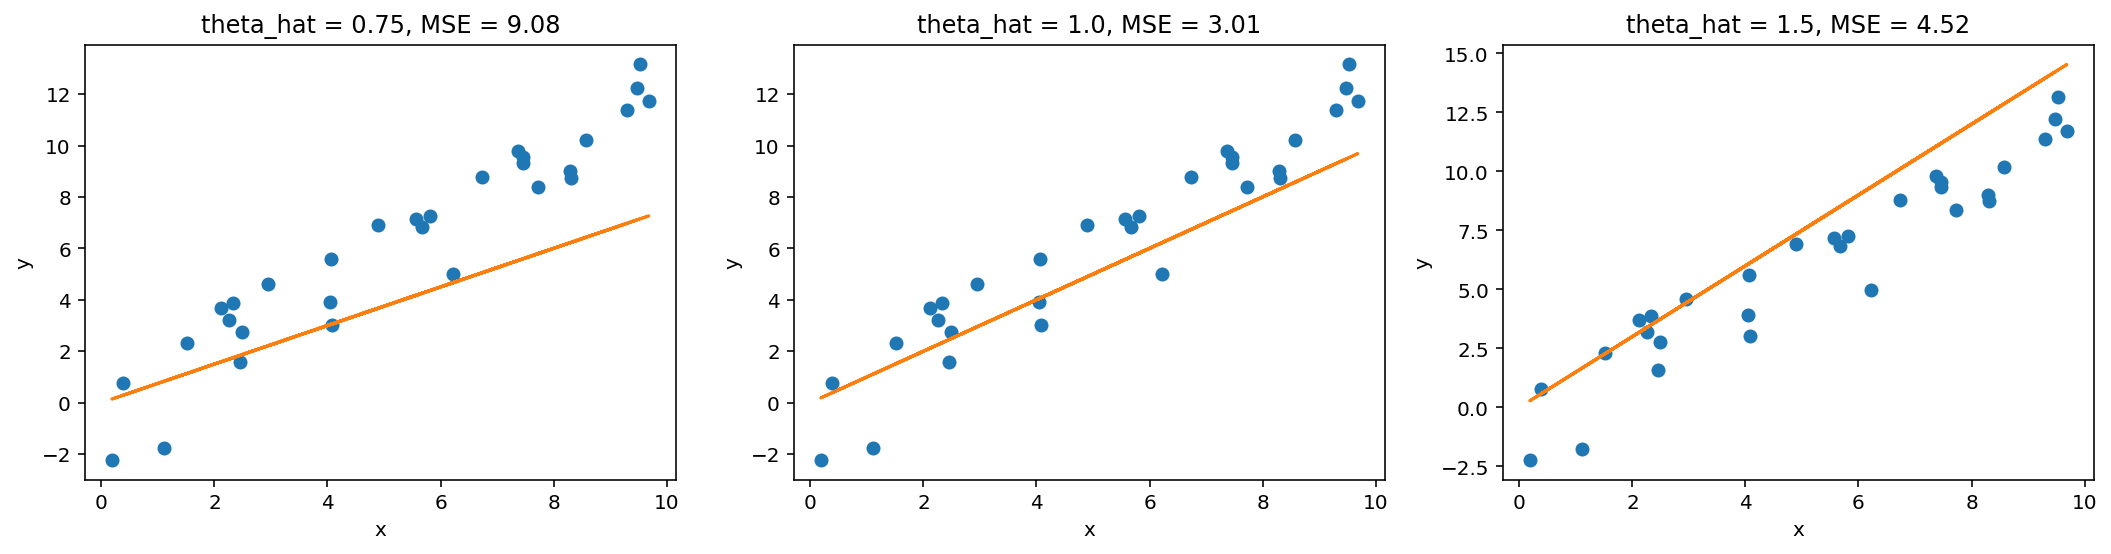

In [8]:
fig, axes = plt.subplots(ncols=3, figsize=(18,4))
for theta_hat, ax in zip(theta_hats, axes):
  ax.scatter(x, y)  # our data scatter plot
  y_hat = theta_hat * x
  ax.plot(x, y_hat, color='C1')  # our estimated model
  ax.set(
    title=f"theta_hat = {theta_hat}, MSE = {mse(x, y, theta_hat):.2f}",
    xlabel='x',
    ylabel='y'       
  );

### Data Exploration

Using an interactive widget, we can easily see how changing our slope estimate changes our model fit. Note that we also display the residuals as segments between observed responses (the data point), and predicted responses (on the slope).

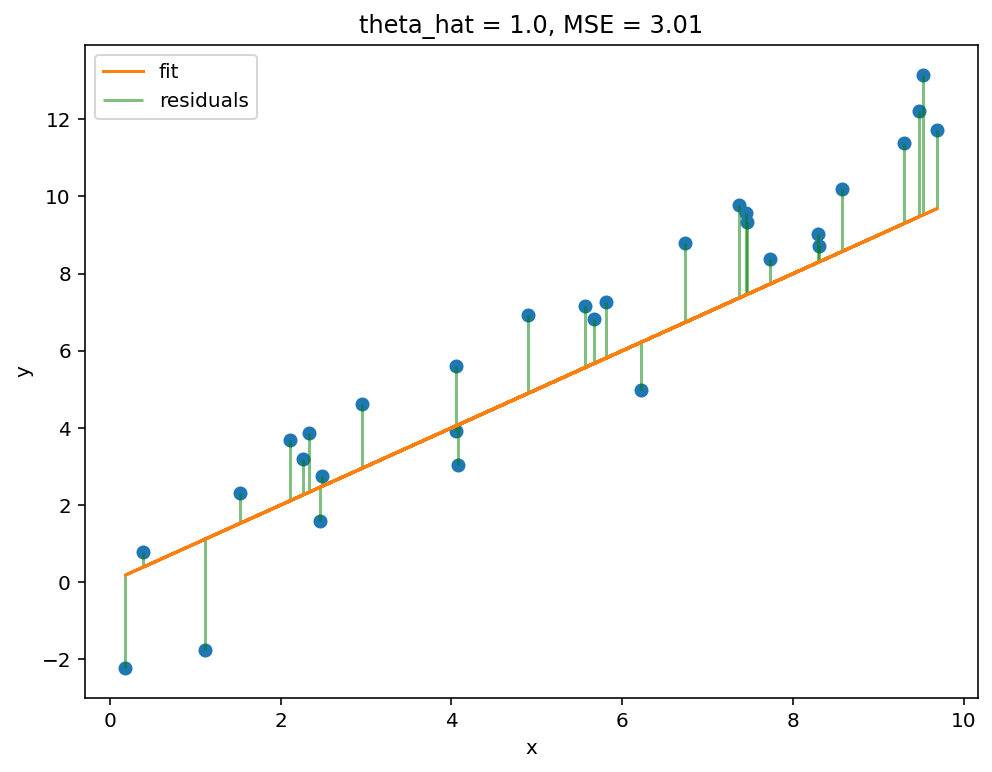

In [9]:
#@title MSE Explorer
@widgets.interact(theta_hat=widgets.FloatSlider(1.0, min=0.0, max=2.0))
def plot_data_estimate(theta_hat):
  fig, ax = plt.subplots()
  ax.scatter(x, y)  # our data scatter plot
  y_hat = theta_hat * x
  ax.plot(x, y_hat, color='C1', label='fit')  # our estimated model
  # plot residuals
  ymin = np.minimum(y, y_hat)
  ymax = np.maximum(y, y_hat)
  ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='residuals')
  ax.set(
    title=f"theta_hat = {theta_hat}, MSE = {mse(x, y, theta_hat):.2f}",
    xlabel='x',
    ylabel='y'
  )
  ax.legend()

While exploring single estimates by hand can be instructive, it's not the most efficient for finding the best estimate to fit our data. Another technique we can use is to evaluate the MSE across a reasonable range of values and plot the resulting error surface.

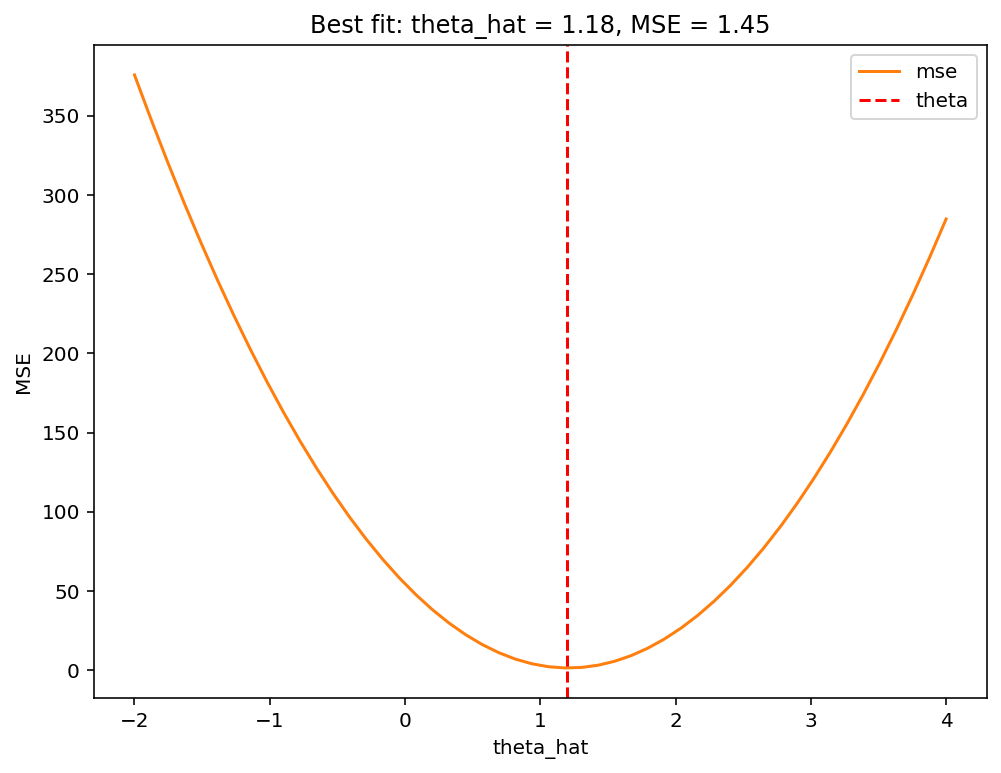

In [10]:
theta_hats = np.linspace(-2.0, 4.0)
errors = np.zeros(len(theta_hats))
for i, theta_hat in enumerate(theta_hats):
  errors[i] = mse(x, y, theta_hat)

fig, ax = plt.subplots()
ax.plot(theta_hats, errors, label='mse', c='C1')
ax.axvline(theta, color='r', ls='--', label="theta")
best_error = np.min(errors)
best_fit = theta_hats[np.argmin(errors)]
ax.set(
  title=f"Best fit: theta_hat = {best_fit:.2f}, MSE = {best_error:.2f}",
  xlabel='theta_hat',
  ylabel='MSE')
ax.legend();

We can see that our best fit is $\hat{\theta}=1.18$ with an MSE of 1.45. This is quite close to the original true value $\theta=1.2$!

While this approach quickly got us to a good estimate, it still relied on evaluating the MSE value across a grid of hand-specified values. If we didn't pick a good range to begin with, or with enough granularity, we might end up in a local minima and not find the best possible estimator. Let's go one step further, and instead of finding the minimum MSE from a set of candidate estimates, let's solve for it analytically.

We can do this by minimizing the cost function. Mean squared error is a convex objective function, therefore we can compute its minimum using calculus.

We set the derivative of the error expression with respect to $\theta$ equal to zero, 

\begin{align}
\frac{d}{d\theta}\frac{1}{N}\sum_{i=1}^N(\hat{y}_i-y_i)^2 = 0
\end{align}

solving for $\theta$, we obtain an optimal value of:

\begin{align}
\hat\theta = \sum_{i=1}^N \frac{x_i y_i}{x_i^2}
\end{align}

This is known as solving the *normal equations*. For different ways of obtaining the solution, see the notes on [Least Squares Optimization](https://www.cns.nyu.edu/~eero/NOTES/leastSquares.pdf) by Eero Simoncelli.

### Exercise: Solve for the Optimal Estimator

In this exercise, you will write a function that finds the optimal $\hat{\theta}$ value using the least squares optimization approach (the previous equation above) to solving MSE minimization. It shoud take as arguments $x$ and $y$, and return the solution $\hat{\theta}$.

In [11]:
def solve_normal_eqn(x, y):
  """Solve the normal equations to produce the value of theta_hat that minimizes
    MSE.  
    
    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    float: the value for theta_hat arrived from minimizing MSE
  """
  ######################################################################
  ## TODO for students: solve for the best parameter using least squares
  ######################################################################
  # comment this out when you've filled
  raise NotImplementedError("Student excercise: solve for theta_hat using least squares")
  return theta_hat

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W1D3-ModelFitting/solutions/W1D3_Tutorial1_Solution_ac36e04c.py)



Use your function to compute an estimate $\hat{\theta}$ and plot the resulting prediction on top of the data.

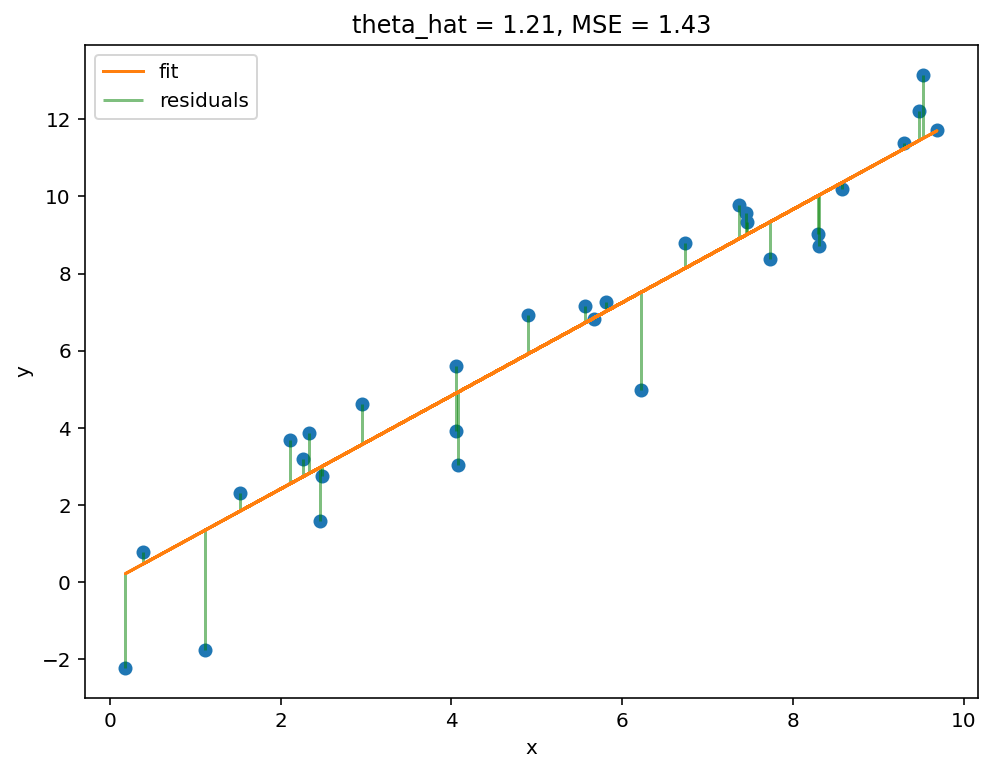

In [13]:
theta_hat = solve_normal_eqn(x, y)
y_hat = theta_hat * x

fig, ax = plt.subplots()
ax.scatter(x, y)  # our data scatter plot
ax.plot(x, y_hat, color='C1', label='fit')  # our estimated model
# plot residuals
ymin = np.minimum(y, y_hat)
ymax = np.maximum(y, y_hat)
ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='residuals')
ax.set(
  title=f"theta_hat = {theta_hat:0.2f}, MSE = {mse(x, y, theta_hat):.2f}",
  xlabel='x',
  ylabel='y'
)
ax.legend();

We see that the analytic solution produces an even better result than our grid search from before, producing $\hat{\theta} = 1.21$ with MSE = 1.43!

## Summary

- Linear least squares regression is an optimisation procedure that can be used for data fitting:
    - Task: predict a value for $y$ given $x$
    - Performance measure: $\textrm{MSE}$
    - Procedure: minimize $\textrm{MSE}$ by solving the normal equations
- **Key point**: We fit the model by defining an *objective function* and minimizing it. 
- **Note**: In this case, there is an *analytical* solution to the minimization problem and in practice, this solution can be computed using *linear algebra*. This is *extremely* powerful and forms the basis for much of numerical computation throughout the sciences.